# Project 4, APS1070 Summer 2024
#### **Linear Regression -  14 points**
**Deadline: July 16th, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Bader Al-Hilawani
*   Your **student number**: 1009724498

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.


Ref: https://stackoverflow.com/a/64487858

## Part 1 - Getting Started [2 marks]

In this project, we are going to design a mathematical model that predicts the song popularity.

For this purpose, we are going to use the [
Spotify_1Million_Tracks](https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks) dataset which includes 1 Million tracks with 19 features between 2000 and 2023. The goal is to unravel patterns and predict the song `popularity` prior to its release.

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random

In [115]:
import pandas as pd
df = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/Spotify_Tracks.csv',
    index_col=None
)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[1.5]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=1`. **[0.5]**
*   Keep the numerical features only. Then, standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[0.5]**
*   Insert a first column of all $1$s in both the training and validation data sets.**[0.5]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[0.5]**

In [116]:
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)  # Set the display width to 1000 characters
print(df)
#To keep the numerical features only, need to drop column track_id
df_1 = df
df_1 = df_1.drop('track_id', axis = 1)
# print(df)

                      track_id  popularity  danceability  energy  key  loudness  speechiness  acousticness  instrumentalness  liveness  valence    tempo  duration_ms  time_signature
0       53QF56cjZA9RTuuMZDrSA6          68         0.483   0.303    4   -10.058       0.0429      0.694000          0.000000    0.1150    0.139  133.406       240166               3
1       1s8tP3jP4GZcyHDsjvw218          50         0.572   0.454    3   -10.286       0.0258      0.477000          0.000014    0.0974    0.515  140.182       216387               4
2       7BRCa8MPiyuvr2VU3O9W0F          57         0.409   0.234    3   -13.711       0.0323      0.338000          0.000050    0.0895    0.145  139.832       158960               4
3       63wsZUhUZLlh1OsyrZq7sz          58         0.392   0.251   10    -9.845       0.0363      0.807000          0.000000    0.0797    0.508  204.961       304293               4
4       6nXIYClvJAfi6ujLiKqEq8          54         0.430   0.791    6    -5.419       0.03

In [117]:
#The target data is the second column and the rest are the features therefore, to make it clean and easy to read we should re-arrange the data to have the target data coloumn at the end.

popularity = df_1.pop('popularity') #pop out the popularity column as that is the target data
df_1.insert(len(df_1.columns), 'popularity', popularity) #insert the popularity column at the end of the df
# print(df) #rearranged data

In [118]:
feature_data = df_1.drop('popularity', axis = 1)
# feature_data = df_1.drop(columns = ['popularity', 'track_id'])
target_data = df_1['popularity']

x_train, x_val, y_train, y_val = train_test_split(feature_data, target_data, test_size=0.2, random_state = 1, shuffle = True) #split the data into 80% training and 20% validation. Also shuffle the data for good practice.


In [119]:
#Standardizing the Data
mean_1 = x_train.mean()
std_1 = x_train.std()

x_train_STD = (x_train - mean_1) / std_1
x_val_STD = (x_val - mean_1) / std_1

#Insert a first column of all  1 s in both the training and validation data sets
x_train_STD.insert(0, 'Theta_0', 1) #Columns of 1s represent the bias or the intercept in regression.
x_val_STD.insert(0, 'Theta_0', 1) #Columns of 1s represent the bias or the intercept in regression.


print(x_train_STD)
print(x_val_STD)




        Theta_0  danceability    energy       key  loudness  speechiness  acousticness  instrumentalness  liveness   valence     tempo  duration_ms  time_signature
771718        1      0.121659 -0.052489 -1.487054  0.045928    -0.511556     -0.843761         -0.684250  0.593630  0.990020  0.470202    -0.572063        0.243734
521462        1      1.118656  1.094474 -0.361964  1.064208    -0.346379     -0.237915         -0.688749 -0.654142  0.300423 -0.879243     0.500302        0.243734
137361        1      0.197518  0.600284 -1.487054  0.796626    -0.306863     -0.900034          1.925244 -0.195909 -0.355626  0.793243     0.576360        0.243734
404985        1     -1.585156 -1.450234 -1.487054 -0.626696    -0.487056      1.123123         -0.619353 -0.520720 -1.546206  0.884448     0.396147        0.243734
910092        1     -0.544811  0.161414 -0.361964 -0.024112     3.011692      0.542639         -0.688749  3.352019  0.128956  0.372051     0.186939        0.243734
...         ... 

Explain why we should not insert the column of  1 s prior to standardization. [0.5]
---
___
If the columns of 1s were inserted during the standardization process then that column would result in a column of 0s for the bias/intercept in regression which is not good. This is because the standardization formula is the respective value - mean / standard devation of the value which in this case would result in [1-1/0] = 0. The mean would be 1 because all values = 0 and the std value would equal = 0 because there is no deviation in any value since they all = 1.

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may cause an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [120]:
from scipy import linalg
from sklearn.metrics import mean_squared_error

W = np.dot(linalg.inv(np.dot(x_train_STD.T, x_train_STD)), np.dot(x_train_STD.T, y_train)) # Train the model using training set: finding weights
y_pred_train = np.dot(x_train_STD, W) # prediction on the training set
y_pred_valid = np.dot(x_val_STD, W) # prediction on the validation set


RMSE_train = np.sqrt(mean_squared_error(y_pred_train, y_train))
RMSE_valid = np.sqrt(mean_squared_error(y_pred_valid, y_val))

print("The Direct solution of the lineae regression problem on the training set is:", W)
print("\n")
print("The RMSE of the training set is:", RMSE_train)
print("\n")
print("The RMSE of the validation set is:", RMSE_valid)



The Direct solution of the lineae regression problem on the training set is: [18.95162625  2.24112076 -2.08359871  0.019801    1.84249926 -0.50749059
 -1.15490771 -2.18760852 -0.68061627 -2.58691499  0.07464918 -1.87898568
  0.12558043]


The RMSE of the training set is: 15.55616997670315


The RMSE of the validation set is: 15.555098035726


## Part 3 - Full Batch Gradient Descent [4 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data.

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.05$, and iterate until your model's **validation** RMSE converges.

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.0005 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part.

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.0005$ as the convergence threshold (CT).
  Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[1]**

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[1]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.0001$)

* Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

--- Total Training Time: 11.896916151046753 (s) ---




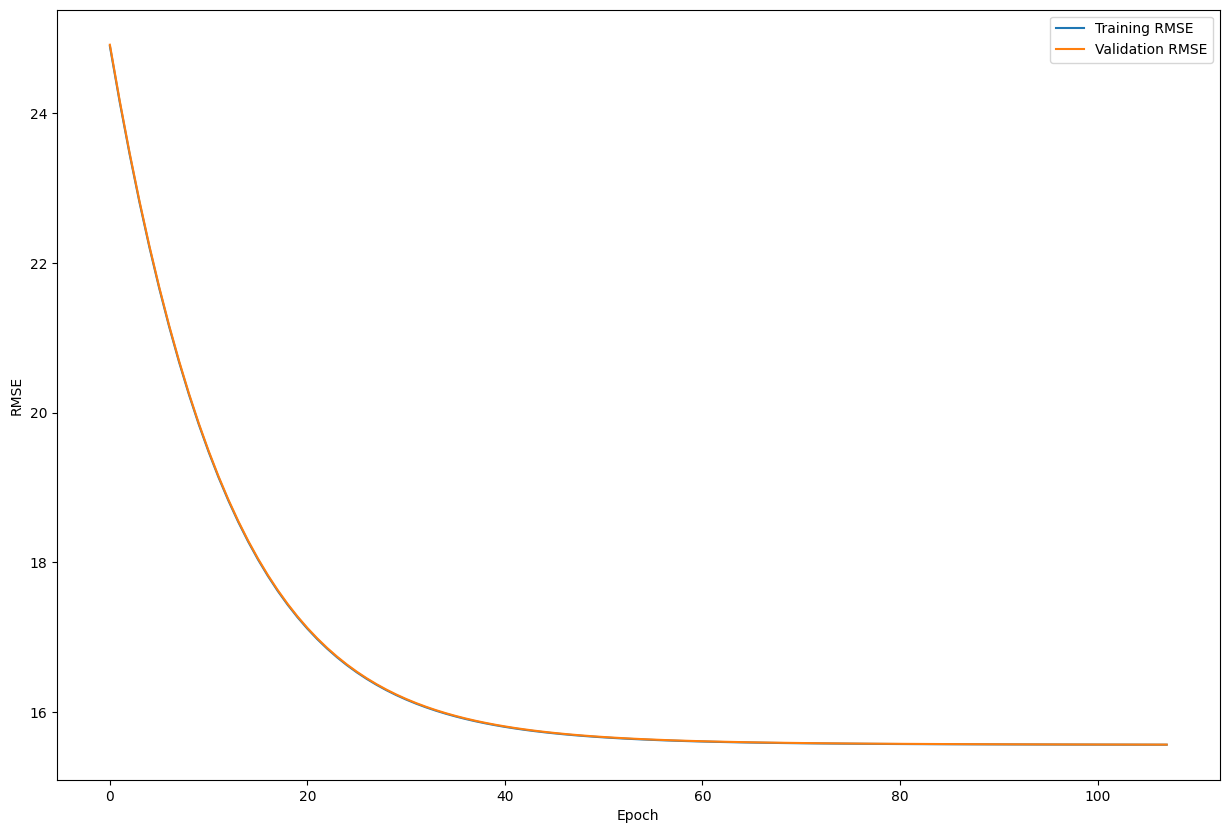

In [121]:
import time
start_time = time.time() ## Records current time
np.random.seed(2)
w = (np.random.random(x_train_STD.shape[1]))*0.0001 ### Inital weights
lr = 0.05  ### Learning rate
CT = RMSE_valid * 1.0005 #convergence threshold which equals RMSE on the val set calculated from the direct solution * 1.0005

rmse_train_array=[]
rmse_val_array=[]

## GD Script -- Sample code in tutorial! ##

for epoch in range (0, 5000): #for loop which loops through a epoch range from 0 to 5000

  y_pred_train = np.dot(x_train_STD, w) # prediction on the training set
  rmse_train_array.append(np.sqrt(mean_squared_error(y_pred_train, y_train))) #append the rmse for training set

  y_pred_valid = np.dot(x_val_STD, w) # prediction on the validation set
  rmse_val_array.append(np.sqrt(mean_squared_error(y_pred_valid, y_val))) #append the rmse for the validation set

  gradient = (1/len(y_pred_train) * np.dot(x_train_STD.T, y_pred_train - y_train)) #calculates the gradient
  w = w - lr * gradient ### weight update



  if rmse_val_array[-1] <= CT: #if statement which considers the gradient descent as having converged when the when RMSE on the validation set
                               #using gradient descent satisfies:RMSE_GD <= [1.0005 x RMSE_Direct_Solution] = convergence threshold (CT)
    break

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

print("\n")


plt.figure(figsize=(15,10))
plt.plot(rmse_train_array, label = 'Training RMSE')
plt.plot(rmse_val_array, label = 'Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()


Comment on overfitting/underfitting by observing the training and validation RMSE [1]
---
___
By observing the training and validation RMSE, the model does not show signs of overfitting as overfitting would mean the training RMSE is lower than the validation RMSE and by observing the data/plot this is not the case. In case of underfitting the model also does not show any signs of underfitting. It can be seen that the gap between the training ans validation RMSE is very small and they both essentially overlap. Thus, the model is well balanced.
___

Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? [0.5]
---
___
Epoch = Each time the model learns the whole dataset

Iteration = Each time we update the weights depending on the batch.

For SGD:

-Each of the [n] samples is a batch and one epoch takes [n] iterations.

For mini-batch:

-The dataset is broken in to [k] smaller batches and one epoch takes [k] iterations.


## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes:
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.05$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

## NEW V1

In [138]:
def mini_batch_gd(x_train_STD, y_train, x_val_STD, y_val, batch_size, lr, CT):
    np.random.seed(100)
    w = np.random.random(x_train_STD.shape[1]) * 0.0001  # Initial weights
    rmse_train_array = []
    rmse_val_array = []
    time_elapsed = []

    start_time = time.time()
    wait_counter=20
    best_val_rmse = 10000000000000000000000 #random large number chose for stopping condition
    wait_counter_starting = 0

    converged = False
    for epoch in range (0, 5000):
        shuffle = np.random.permutation(x_train_STD.shape[0])
        X_train_STD_shuffled = x_train_STD[shuffle]
        y_train_shuffled = y_train[shuffle]

        for i in range(0, x_train_STD.shape[0], batch_size):
            x_batch = X_train_STD_shuffled[i:i + batch_size]
            y_batch = y_train_shuffled[i:i + batch_size]

            y_pred_batch = np.dot(x_batch, w)
            gradient = (1/len(y_batch)) * np.dot(x_batch.T, y_pred_batch - y_batch)
            w = w - lr * gradient

        # Compute RMSE for full training and validation sets after each epoch
        y_pred_train = np.dot(x_train_STD, w)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        rmse_train_array.append(rmse_train)

        y_pred_val = np.dot(x_val_STD, w)
        rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
        rmse_val_array.append(rmse_val)

        time_elapsed.append(time.time() - start_time)

        # Check for convergence
        if rmse_val <= CT:
            print(f"Converged at epoch {epoch+1}")
            converged = True
            break

        # Check for divergence
        if rmse_val < best_val_rmse:
            best_val_rmse = rmse_val
            wait_counter_starting = 0
        else:
            wait_counter_starting += 1

        if wait_counter_starting >= wait_counter:
            print(f"Model stopped for this batch size due to increasing RMSE at epoch {epoch+1}")
            break

    return w, rmse_train_array, rmse_val_array, time_elapsed, converged

lr = 0.05
CT = RMSE_valid * 1.0005
batch_sizes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288]
converged_batch_sizes = []
results = {}

for batch_size in batch_sizes:
    print(f"\nTraining with batch size: {batch_size}")
    w, rmse_train, rmse_val, time_elapsed,converged = mini_batch_gd(x_train_STD.values, y_train.values, x_val_STD.values, y_val.values, batch_size, lr, CT)
    results[batch_size] = {
        'weights': w,
        'train_rmse': rmse_train,
        'val_rmse': rmse_val,
        'time_elapsed': time_elapsed,
        'converged': converged
    }
    if converged:
        converged_batch_sizes.append(batch_size)
    print(f"Final Training RMSE: {rmse_train[-1]}, Final Validation RMSE: {rmse_val[-1]}")
    print(f"Total training time: {time_elapsed[-1]:.2f} seconds")
    print(f"Final Weight: {w}")
    print(f"Converged: {converged}")


Training with batch size: 2
Model stopped for this batch size due to increasing RMSE at epoch 39
Final Training RMSE: 17.101317492602135, Final Validation RMSE: 17.08585953082196
Total training time: 159.66 seconds
Final Weight: [16.1713223   2.67490501 -3.6726945   5.53614265  3.32537752  0.75350298
 -2.43839918 -3.41408231 -1.96912145 -2.64423278 -1.4384352  -1.71442729
  1.46283893]
Converged: False

Training with batch size: 4
Model stopped for this batch size due to increasing RMSE at epoch 32
Final Training RMSE: 16.488977964925194, Final Validation RMSE: 16.480218941941967
Total training time: 72.56 seconds
Final Weight: [17.23433855  2.73132368 -1.1362966   1.19020191  2.97647834 -0.23074429
 -2.75965284 -1.70732382 -0.16189922 -1.61388088  1.50019071 -0.39304667
  1.2973876 ]
Converged: False

Training with batch size: 8
Model stopped for this batch size due to increasing RMSE at epoch 47
Final Training RMSE: 15.967173087855478, Final Validation RMSE: 15.964710449799453
Total

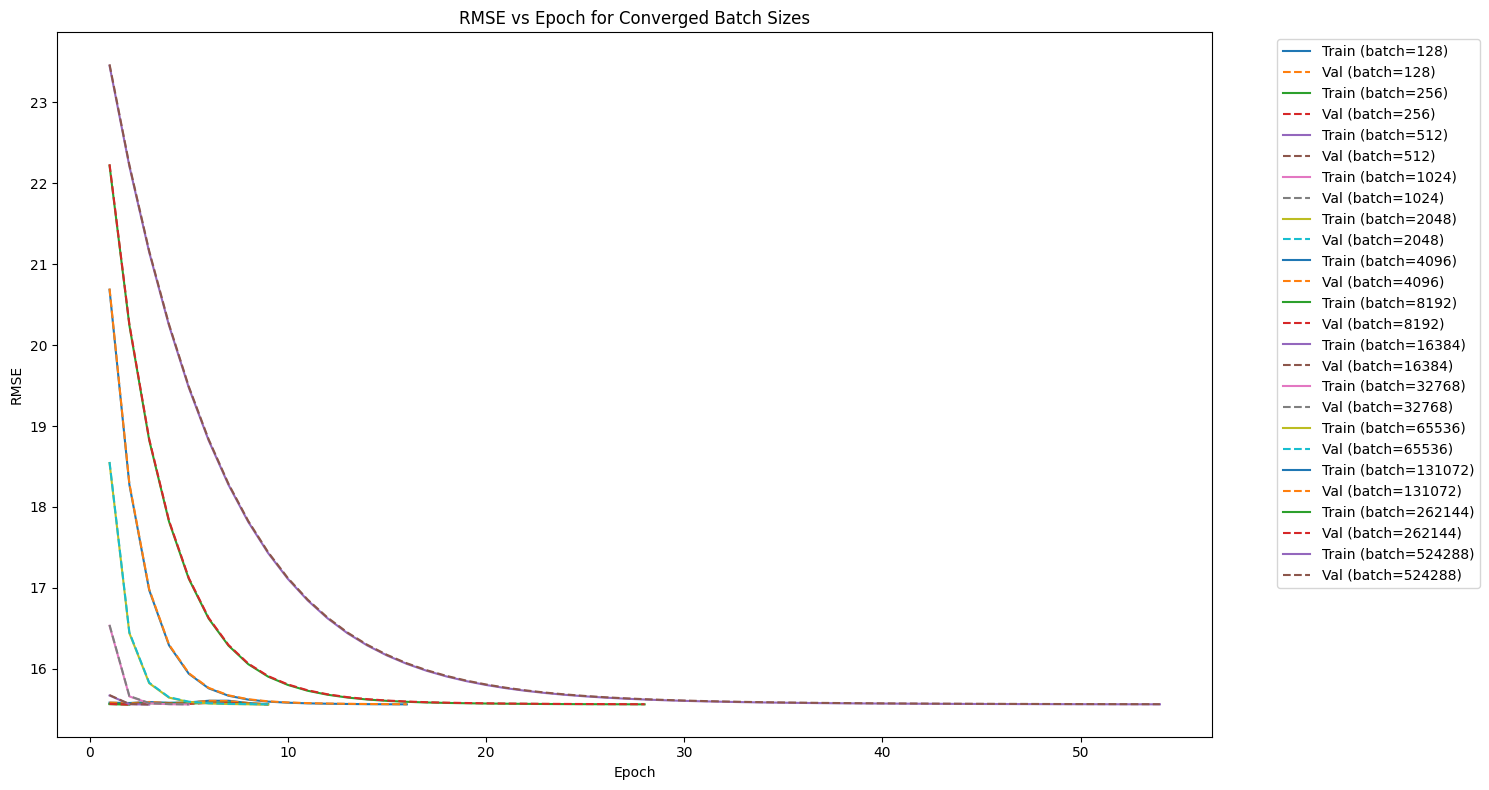

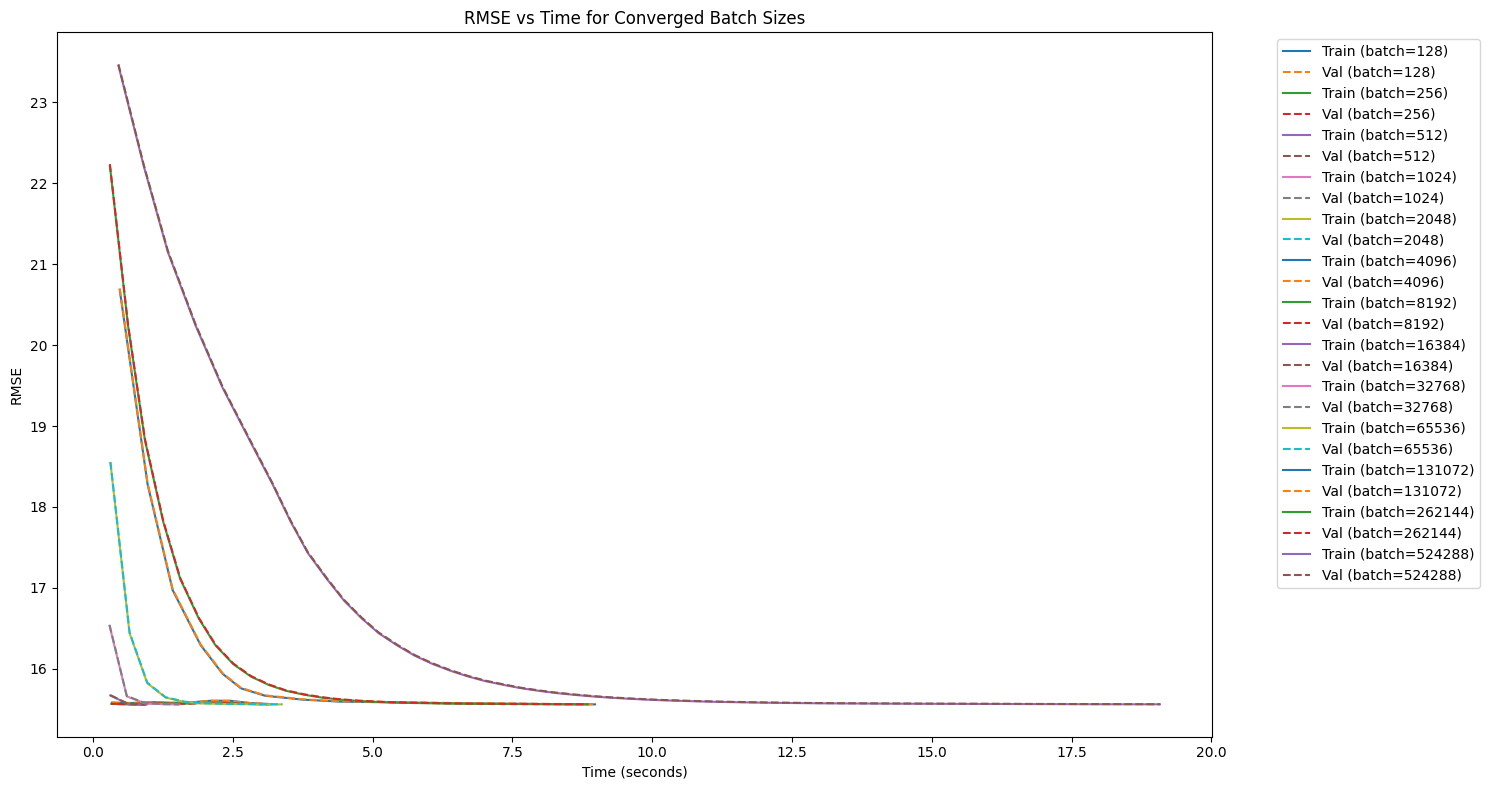

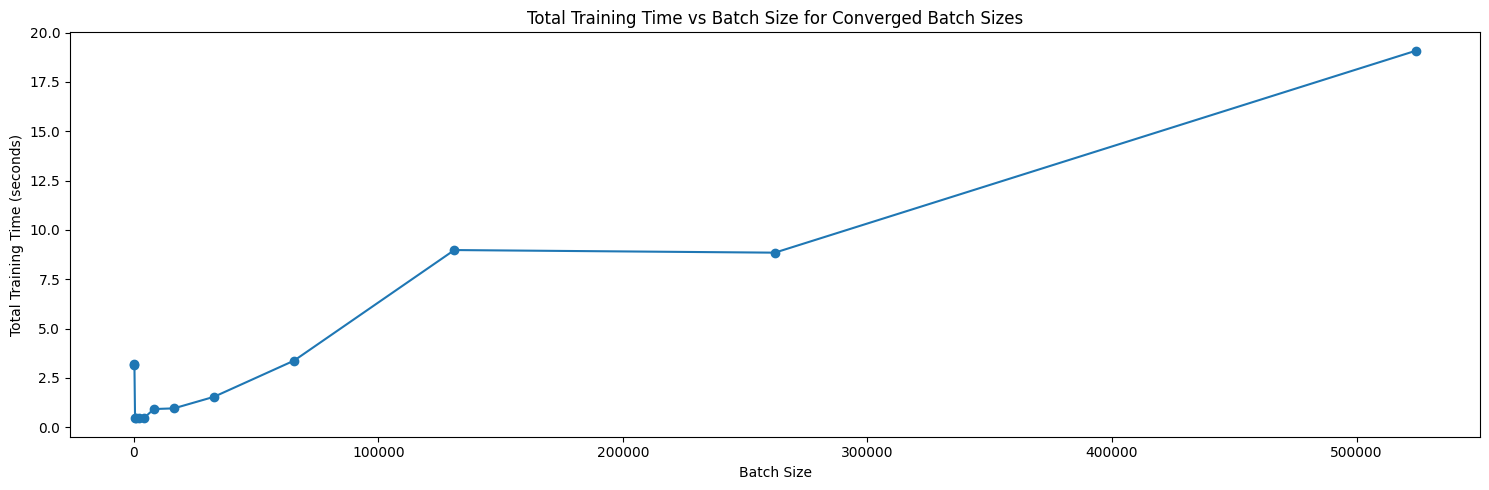

In [139]:
import matplotlib.pyplot as plt

#Plot training and validation RMSE vs. epoch for converged batch sizes
plt.figure(figsize=(15, 8))
for batch_size in converged_batch_sizes:
    data = results[batch_size]
    epochs = range(1, len(data['train_rmse']) + 1)
    plt.plot(epochs, data['train_rmse'], label=f'Train (batch={batch_size})')
    plt.plot(epochs, data['val_rmse'], label=f'Val (batch={batch_size})', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE vs Epoch for Converged Batch Sizes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Plot training and validation RMSE vs. time for converged batch sizes
plt.figure(figsize=(15, 8))
for batch_size in converged_batch_sizes:
    data = results[batch_size]
    plt.plot(data['time_elapsed'], data['train_rmse'], label=f'Train (batch={batch_size})')
    plt.plot(data['time_elapsed'], data['val_rmse'], label=f'Val (batch={batch_size})', linestyle='--')

plt.xlabel('Time (seconds)')
plt.ylabel('RMSE')
plt.title('RMSE vs Time for Converged Batch Sizes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Plot Total training time vs. Batch size for converged batch sizes
total_times = [results[batch_size]['time_elapsed'][-1] for batch_size in converged_batch_sizes]

plt.figure(figsize=(15, 5))
plt.plot(converged_batch_sizes, total_times, marker='o')
plt.xlabel('Batch Size')
plt.ylabel('Total Training Time (seconds)')
plt.title('Total Training Time vs Batch Size for Converged Batch Sizes')
plt.tight_layout()
plt.show()

Describe your findings, including the main takeaways from each of your plots. [1]
---
___
Graph 1: RMSE vs Epoch for Converged Batch Sizes

It can be seen that as the number of batches increase for the batches that converged, the RMSE value for the training and learning also increase along with the epoch number with the exception of batch size 256 and 128. This is likely due to the stopping condition to converge (rmse_val <= CT) in that it took a longer time to converge therefore the epoch sizes were greater.
___
Graph 2: RMSE vs Time for Converged Batch Sizes

For Graph 2 (RMSE vs Time for Converged Batch Sizes), the same general trend can be noticed as in Graph 1. As the RMSE value increased for the batches that converged, the time it took to converge was larger.

___
Graph 3: Total Training Time vs Batch Size for Converged Batch Sizes

For Graph 3 (Total Training Time vs Batch Size for Converged Batch Sizes), the same general trend can be noticed as in Graph 1. As the number of batch sizes increased for the batches that converged, the time it took to converge was larger with the exception of batch sizes 256 and 128 which is due to the stopping condition.
___
General take away:
The model only converges with batch size 128 and greater. Even then, originally, the model only converged with a vatch size 512 however, by increasing the wait time for a batch size to converge, batch size 128 and greater began to converge. The wait time was further increased however, the sizes smaller than 128 did not converge.

## Part 5 - Gradient Descent Learning Rate [3 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.05$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[1]**

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD.
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[1]**

NEW V2:
---

In [125]:
### batch size: 8 (0.001), 16 (0.005), 32 (0.01)
def mini_batch_gd(x_train_STD, y_train, x_val_STD, y_val, batch_size, lr, CT):
    np.random.seed(100)
    w = np.random.random(x_train_STD.shape[1]) * 0.0001  # Initial weights
    rmse_train_array = []
    rmse_val_array = []
    time_elapsed = []

    start_time = time.time()
    wait_counter=20
    best_val_rmse = 100000000000000000000000000000000000000000#random large number
    wait_counter_starting = 0

    converged = False
    for epoch in range (0, 5000):
        shuffle = np.random.permutation(x_train_STD.shape[0])
        X_train_STD_shuffled = x_train_STD[shuffle]
        y_train_shuffled = y_train[shuffle]

        for i in range(0, x_train_STD.shape[0], batch_size):
            x_batch = X_train_STD_shuffled[i:i + batch_size]
            y_batch = y_train_shuffled[i:i + batch_size]

            y_pred_batch = np.dot(x_batch, w)
            gradient = (1/len(y_batch)) * np.dot(x_batch.T, y_pred_batch - y_batch)
            w = w - lr * gradient

        # Compute RMSE for full training and validation sets after each epoch
        y_pred_train = np.dot(x_train_STD, w)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        rmse_train_array.append(rmse_train)

        y_pred_val = np.dot(x_val_STD, w)
        rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
        rmse_val_array.append(rmse_val)

        time_elapsed.append(time.time() - start_time)

        # Check for convergence
        if rmse_val <= CT:
            print(f"Converged at epoch {epoch+1}")
            converged = True
            break

        # Check for divergence
        if rmse_val < best_val_rmse:
            best_val_rmse = rmse_val
            wait_counter_starting = 0
        else:
            wait_counter_starting += 1

        if wait_counter_starting >= wait_counter:
            print(f"Model stopped for this batch size due to increasing RMSE at epoch {epoch+1}")
            break

    return w, rmse_train_array, rmse_val_array, time_elapsed, converged

lr = 0.001
CT = RMSE_valid * 1.0005
batch_sizes = [8, 16, 32] #3 batch sizes that did not converge

lr_1 = [0.01, 0.005, 0.001] #learning rates to run through for each batch size.

results = []
for batch_size in batch_sizes:
    for lr in lr_1:
        print(f"\nBatch size: {batch_size} and learning rate: {lr}")
        w, rmse_train, rmse_val, time_elapsed,converged = mini_batch_gd(x_train_STD.values, y_train.values, x_val_STD.values, y_val.values, batch_size, lr, CT)

        if converged:
            results.append({
                'batch_size': batch_size,
                'learning_rate': lr,
                'final_train_rmse': rmse_train[-1],
                'final_val_rmse': rmse_val[-1]
            })
            break  #stop testing on learning rate once it converged.


results_table = pd.DataFrame(results)
print(results_table)


Batch size: 8 and learning rate: 0.01
Model stopped for this batch size due to increasing RMSE at epoch 29

Batch size: 8 and learning rate: 0.005
Model stopped for this batch size due to increasing RMSE at epoch 29

Batch size: 8 and learning rate: 0.001
Converged at epoch 1

Batch size: 16 and learning rate: 0.01
Model stopped for this batch size due to increasing RMSE at epoch 29

Batch size: 16 and learning rate: 0.005
Converged at epoch 9

Batch size: 32 and learning rate: 0.01
Converged at epoch 9
   batch_size  learning_rate  final_train_rmse  final_val_rmse
0           8          0.001         15.560808       15.561407
1          16          0.005         15.562314       15.560700
2          32          0.010         15.562285       15.560670


In [141]:
## Training with batch size: 4096 was the fastest. Now to sweep.

### batch size: 8 (0.001), 16 (0.005), 32 (0.01)
def mini_batch_gd(x_train_STD, y_train, x_val_STD, y_val, batch_size, lr, CT):
    np.random.seed(100)
    w = np.random.random(x_train_STD.shape[1]) * 0.0001  # Initial weights
    rmse_train_array = []
    rmse_val_array = []
    time_elapsed = []

    start_time = time.time()
    wait_counter=20
    best_val_rmse = 1000000000000000000000000000000000000000000#random large number
    wait_counter_starting = 0

    converged = False
    for epoch in range (0, 5000):
        shuffle = np.random.permutation(x_train_STD.shape[0])
        X_train_STD_shuffled = x_train_STD[shuffle]
        y_train_shuffled = y_train[shuffle]

        for i in range(0, x_train_STD.shape[0], batch_size):
            x_batch = X_train_STD_shuffled[i:i + batch_size]
            y_batch = y_train_shuffled[i:i + batch_size]

            y_pred_batch = np.dot(x_batch, w)
            gradient = (1/len(y_batch)) * np.dot(x_batch.T, y_pred_batch - y_batch)
            w = w - lr * gradient

        # Compute RMSE for full training and validation sets after each epoch
        y_pred_train = np.dot(x_train_STD, w)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        rmse_train_array.append(rmse_train)

        y_pred_val = np.dot(x_val_STD, w)
        rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
        rmse_val_array.append(rmse_val)

        time_elapsed.append(time.time() - start_time)

        # Check for convergence
        if rmse_val <= CT:
            print(f"Converged at epoch {epoch+1}")
            converged = True
            break

        # Check for divergence
        if rmse_val < best_val_rmse:
            best_val_rmse = rmse_val
            wait_counter_starting = 0
        else:
            wait_counter_starting += 1

        if wait_counter_starting >= wait_counter:
            print(f"Stopping early due to increasing RMSE at epoch {epoch+1}")
            break

    return w, rmse_train_array, rmse_val_array, time_elapsed, converged

lr = []
CT = RMSE_valid * 1.0005
batch_size = 4096

learning_rates_to_test = [0.01, 0.007, 0.005, 0.002, 0.001, 0.0008, 0.0007, 0.0005, 0.0003, 0.0001]

results = []
for lr in learning_rates_to_test:
        print(f"\nBatch size: {batch_size} and learning rate: {lr}")
        w, rmse_train, rmse_val, time_elapsed,converged = mini_batch_gd(x_train_STD.values, y_train.values, x_val_STD.values, y_val.values, batch_size, lr, CT)

        if converged:
            results.append({
            'learning_rate': lr,
            'train_rmse': rmse_train,
            'val_rmse': rmse_val,
            'time_elapsed': time_elapsed
            })



Batch size: 4096 and learning rate: 0.01
Converged at epoch 3

Batch size: 4096 and learning rate: 0.007
Converged at epoch 4

Batch size: 4096 and learning rate: 0.005
Converged at epoch 6

Batch size: 4096 and learning rate: 0.002
Converged at epoch 14

Batch size: 4096 and learning rate: 0.001
Converged at epoch 28

Batch size: 4096 and learning rate: 0.0008
Converged at epoch 35

Batch size: 4096 and learning rate: 0.0007
Converged at epoch 40

Batch size: 4096 and learning rate: 0.0005
Converged at epoch 55

Batch size: 4096 and learning rate: 0.0003
Converged at epoch 92

Batch size: 4096 and learning rate: 0.0001
Converged at epoch 274


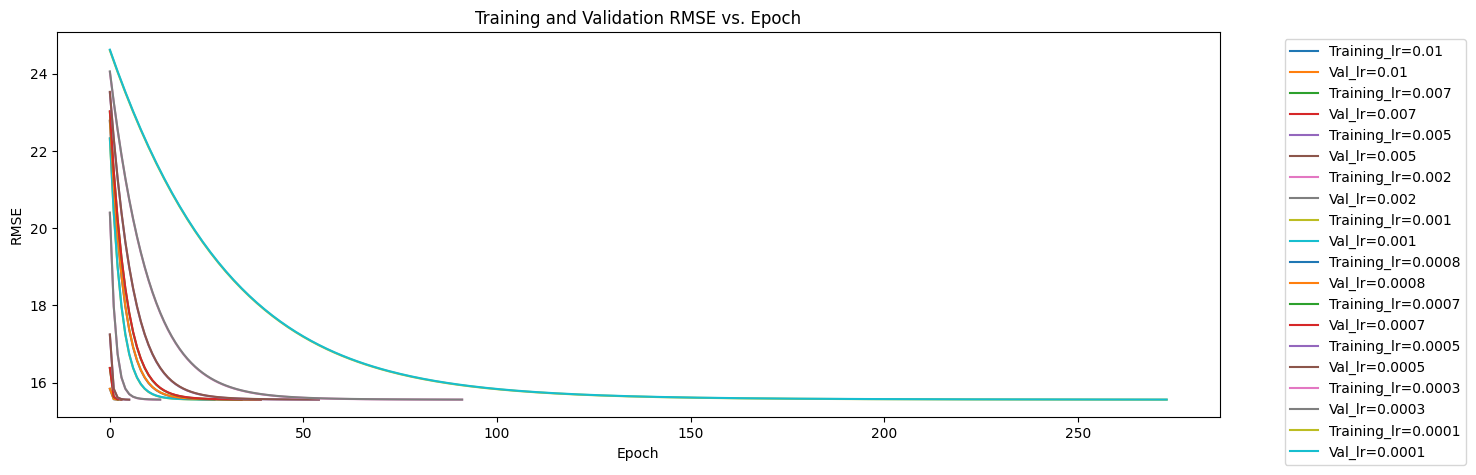

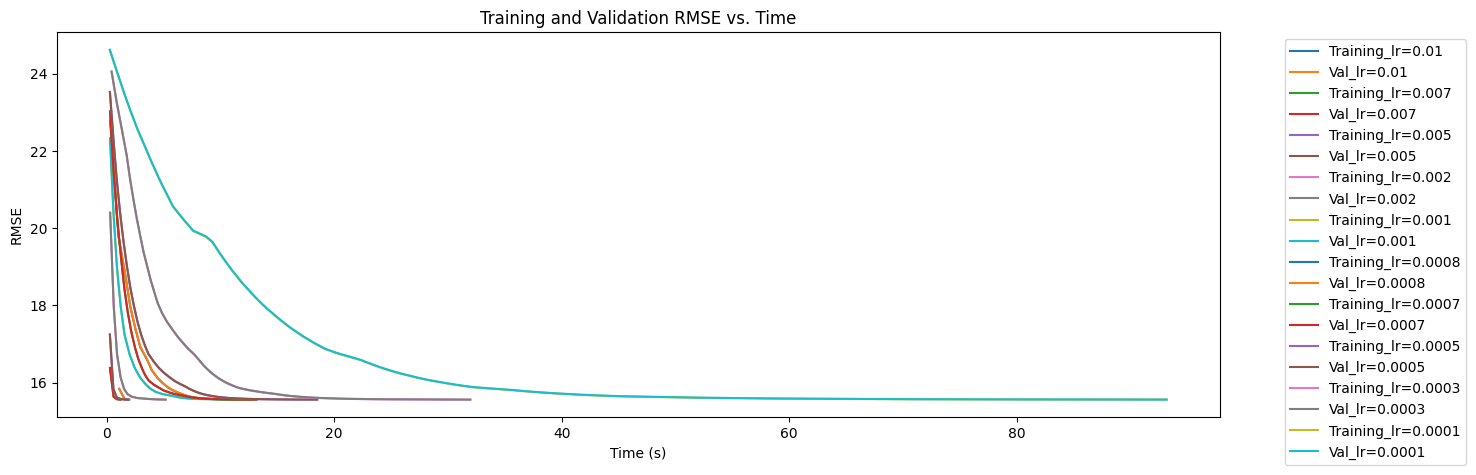

In [135]:
# Plotting RMSE vs. Epoch
plt.figure(figsize=(15, 5))
for result in results:

    plt.plot(result['train_rmse'], label=f"Training_lr={result['learning_rate']}")
    plt.plot(result['val_rmse'], label=f"Val_lr={result['learning_rate']}")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("Training and Validation RMSE vs. Epoch")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plotting RMSE vs. Time
plt.figure(figsize=(15, 5))
for result in results:
    plt.plot(result['time_elapsed'], result['train_rmse'], label=f"Training_lr={result['learning_rate']}")
    plt.plot(result['time_elapsed'], result['val_rmse'], label=f"Val_lr={result['learning_rate']}")
plt.xlabel("Time (s)")
plt.ylabel("RMSE")
plt.title("Training and Validation RMSE vs. Time")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Describe your findings, including the main takeaways from each of your plots. [1]
---
___
Graph 1: Training and Validation RMSE vs. Epoch

Using the batch size which has the fastest convergence time (batch size = 4096), the trend that is noticed here is as the learning rate decreases, the epoch number also increased. This is because the learning rate dictates the speed at which the model converges. With a smaller learning rate, smaller steps are taken thus, the time to converge is longer and the the epoch size is greater.
___
Graph 2: Training and Validation RMSE vs. Time

The same general trend can be noticed for Graph 2 when compared to Graph 1. The RMSE value and time increased as the learning rate decreased. This is due to the model converging slower because of the smaller learning rate which increased the RMSE values.
___
Main Takeaway:

With a larger learning rate, the model learns faster therefore, the time to convergence is smaller and the RMSE value is smaller. However, this can cause overshooting as the model will take larger steps and possibly miss the global min. However, with a smaller learning rate, the model can underfit since the model won't learn with a reasonable amount of epoch thus failing to capture the patterns in the data. This will lead to a higher RMSE value. The key is to find a reasonable number for the learning rate to avoid this.